In [ ]:
!pip install random2

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#normal training data extraction from .nii files
#leavinng all the black slides and corping the images
#only non black ot slides are considered
#each image dimension 192 x 192 and saved as .jpg format in grayscale


import os
import nibabel as nib
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import random2

data_dict = {
    "Flair" : "flair",
    "T1" : "t1",
    "T2" : "t2",
    "DWI" : "dwi",
    "OT" : 'ot'
}
#data_types = ["Flair"]
data_types = ["OT"]

dir_path = r"C:\Users\srivi\Downloads\New folder (16)\ISLES Challenge 2015\SISS2015_Training"

folders = []
for i in range(1,29):
    folders.append(str(i))

prefix = ["%.2d" % i for i in range(1,100)]
imgNum = ["%.3d" % i for i in range(0,999999)]

upper_black_slide = 0
lower_black_slide = 0
new_subject = True
blank_slide_list = []

print("Saving Flair Images....")
img_name = []

c=-1
for folder in tqdm(folders):
    c+=1
    flairImg=0
    validIndex = []
    new_subject_list = []
    upper_black_slide = 0
    lower_black_slide = 0
    new_subject = True
    sub_folders = os.listdir(os.path.join(dir_path,folder))
    for sub_folder in sub_folders:
        file_names = os.listdir(os.path.join(dir_path,folder,sub_folder))
        for each_file in file_names:
            if ".nii" in each_file:
                data = nib.load(os.path.join(dir_path,folder,sub_folder,each_file))
                data = data.get_fdata().T
                if data_types[0] in each_file:
                    for i in range(data.shape[0]):
                        temp = np.sum(data[i])
                        if temp!=0:
                            new_subject = False
                            #name = str("./data/normal_data/training/mask/"+prefix[c]+"_"+imgNum[flairImg]+".jpg")
                            #name = str("./full_data/normal_data/training/mask/"+prefix[c]+"_"+imgNum[flairImg]+".jpg")
                            name = str("./full_data/normal_data/training/flair/"+prefix[c]+"_"+imgNum[flairImg]+".jpg")
                            ss = [str(prefix[c]+"_"+imgNum[flairImg]+".jpg")]
                            img_name.append(ss)
                            flairImg+=1
                            img = data[i]
                            img = img[19:211,19:211]
                            plt.imsave(name,img,cmap='gray')
                        else :
                            if new_subject :
                                upper_black_slide+=1
                            else:
                                lower_black_slide+=1
    new_subject_list.append(upper_black_slide)
    new_subject_list.append(lower_black_slide)
    blank_slide_list.append(new_subject_list)

np.save("./full_data/normal_data/training/imageNames",img_name)
#other data extract

for key in data_dict:
    print("Saving {} Images....".format(key))
    c=-1
    count = 0
    raw_data = []
    p = 0
    for folder in tqdm(folders):
        c+=1
        p+=1
        count=0
        sub_folders = os.listdir(os.path.join(dir_path,folder))
        for sub_folder in sub_folders:
            file_names = os.listdir(os.path.join(dir_path,folder,sub_folder))
            for each_file in file_names:
                if ".nii" in each_file:
                    data = nib.load(os.path.join(dir_path,folder,sub_folder,each_file))
                    data = data.get_fdata().T
                    if key in each_file:
                        for i in range(blank_slide_list[p-1][0],data.shape[0]-blank_slide_list[p-1][1]):
                            #name = str("./data/normal_data/training/"+str(key)+"/"+prefix[c]+"_"+imgNum[count]+".jpg")
                            name = str("./full_data/normal_data/training/"+str(key)+"/"+prefix[c]+"_"+imgNum[count]+".jpg")
                            img = data[i]
                            img = img[19:211,19:211]
                            plt.imsave(name,img,cmap='gray')
                            count+=1

Saving Flair Images....


100%|██████████| 28/28 [00:12<00:00,  2.20it/s]


Saving Flair Images....


100%|██████████| 28/28 [00:13<00:00,  2.15it/s]


Saving T1 Images....


100%|██████████| 28/28 [00:13<00:00,  2.13it/s]


Saving T2 Images....


100%|██████████| 28/28 [00:12<00:00,  2.29it/s]


Saving DWI Images....


100%|██████████| 28/28 [00:12<00:00,  2.27it/s]


Saving OT Images....


100%|██████████| 28/28 [00:11<00:00,  2.40it/s]


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import random

ign = np.load(r'C:\Users\srivi\Downloads\New folder (16)\ISCHEMIC-STROKE-LESION-SEGMENTATION-BY-DEEP-LEARNING-ISLES-2015-master\SISS\full_data\normal_data\training\dataset2\imageNames.npy')
imagenames = []
for i in range(ign.shape[0]):
    imagenames.append(ign[i][0])

random.shuffle(imagenames)
print('total images={}'.format(len(imagenames)))
split = int(len(imagenames)*0.8)

trainImageNames = imagenames[:split]
validImageNames = imagenames[split:]
print('training images={}'.format(len(trainImageNames)))
print('validation images={}'.format(len(validImageNames)))

print(trainImageNames[:5])
print(validImageNames[:5])

#augmented image from one image
ifi = 7

data_gen_args = dict(
                    rescale=1.0/255,
                    rotation_range=30,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range=0.2,
                    zoom_range=0.1)

def trainset(b_size):
    print('creating augmented training images...')
    seed = 1337
    image_datagen = ImageDataGenerator(**data_gen_args)
    mask_datagen = ImageDataGenerator(**data_gen_args)

    save_here_img = r'C:\Users\srivi\Downloads\New folder (16)\ISCHEMIC-STROKE-LESION-SEGMENTATION-BY-DEEP-LEARNING-ISLES-2015-master\SISS\full_data\normal_data\training\dataset2\augmented_data\training\image'
    save_here_mask = r'C:\Users\srivi\Downloads\New folder (16)\ISCHEMIC-STROKE-LESION-SEGMENTATION-BY-DEEP-LEARNING-ISLES-2015-master\SISS\full_data\normal_data\training\dataset2\augmented_data\training\mask'

    k=0
    for i in range(len(trainImageNames)):
        normalimgPath = r'C:\Users\srivi\Downloads\New folder (16)\ISCHEMIC-STROKE-LESION-SEGMENTATION-BY-DEEP-LEARNING-ISLES-2015-master\SISS\full_data\normal_data\training\dataset2\t1\{}'.format(trainImageNames[i])
        normalmaskPath = r'C:\Users\srivi\Downloads\New folder (16)\ISCHEMIC-STROKE-LESION-SEGMENTATION-BY-DEEP-LEARNING-ISLES-2015-master\SISS\full_data\normal_data\training\dataset2\ot\{}'.format(trainImageNames[i])
        img = np.expand_dims(plt.imread(normalimgPath),0)
        mask = np.expand_dims(plt.imread(normalmaskPath),0)
        for x, y, val in zip(image_datagen.flow(img,batch_size=b_size,seed=seed,save_to_dir=save_here_img,save_prefix='aug_{}'.format(str(k)),save_format='jpg'),
                            mask_datagen.flow(mask,batch_size=b_size,seed=seed,save_to_dir=save_here_mask,save_prefix='aug_{}'.format(str(k)),save_format='jpg'),
                            range(ifi)) :
            #yield(x,y)
            k+=1

def validset(b_size):
    print('creating augmented validation images...')
    seed = 1243
    image_datagen = ImageDataGenerator(**data_gen_args)
    mask_datagen = ImageDataGenerator(**data_gen_args)

    save_here_img = r'C:\Users\srivi\Downloads\New folder (16)\ISCHEMIC-STROKE-LESION-SEGMENTATION-BY-DEEP-LEARNING-ISLES-2015-master\SISS\full_data\normal_data\training\dataset2\augmented_data\validation\image'
    save_here_mask = r'C:\Users\srivi\Downloads\New folder (16)\ISCHEMIC-STROKE-LESION-SEGMENTATION-BY-DEEP-LEARNING-ISLES-2015-master\SISS\full_data\normal_data\training\dataset2\augmented_data\validation\mask'

    k=0
    for i in range(len(validImageNames)):
        normalimgPath = r'C:\Users\srivi\Downloads\New folder (16)\ISCHEMIC-STROKE-LESION-SEGMENTATION-BY-DEEP-LEARNING-ISLES-2015-master\SISS\full_data\normal_data\training\dataset2\t1\{}'.format(trainImageNames[i])
        normalmaskPath = r'C:\Users\srivi\Downloads\New folder (16)\ISCHEMIC-STROKE-LESION-SEGMENTATION-BY-DEEP-LEARNING-ISLES-2015-master\SISS\full_data\normal_data\training\dataset2\ot\{}'.format(trainImageNames[i])
        img = np.expand_dims(plt.imread(normalimgPath),0)
        mask = np.expand_dims(plt.imread(normalmaskPath),0)
        for x, y, val in zip(image_datagen.flow(img,batch_size=b_size,seed=seed,save_to_dir=save_here_img,save_prefix='aug_{}'.format(str(k)),save_format='jpg'),
                            mask_datagen.flow(mask,batch_size=b_size,seed=seed,save_to_dir=save_here_mask,save_prefix='aug_{}'.format(str(k)),save_format='jpg'),
                            range(ifi)) :
            #yield(x,y)
            k+=1


trainset(3)
validset(3)

total images=1356
training images=1084
validation images=272
['06_008.jpg', '17_001.jpg', '23_016.jpg', '23_000.jpg', '01_054.jpg']
['14_029.jpg', '09_023.jpg', '01_055.jpg', '13_022.jpg', '21_004.jpg']
creating augmented training images...
creating augmented validation images...


In [1]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPUs Available: ", gpus)
else:
    print("No GPU was detected.")

TensorFlow version: 2.15.0
GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import os
import math
import nibabel
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import time

from tensorflow.python.keras.utils.data_utils import Sequence
import tensorflow as tf
from tensorflow.python.keras import layers
from tensorflow.python.keras import losses
from tensorflow.python.keras import models
from tensorflow.python.keras import backend as K

from keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
num_train_examples = len(os.listdir(r'/content/gdrive/MyDrive/dataset2/augmented_data/training/mask'))
num_val_examples = len(os.listdir(r'/content/gdrive/MyDrive/dataset2/augmented_data/validation/mask'))

print("Number of training examples: {}".format(num_train_examples))
print("Number of validation examples: {}".format(num_val_examples))

Number of training examples: 8672
Number of validation examples: 2176


In [5]:
import torch
import torchvision
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import os
from PIL import Image

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

class ImageMaskDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = os.listdir(image_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.images[idx])
        mask_path = os.path.join(self.mask_dir, self.images[idx])  # Assuming mask names are same as images
        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # Grayscale for mask

        if self.transform is not None:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((192, 192))
])

batch_size = 32  # Define batch size

train_img_dir = r"/content/gdrive/MyDrive/dataset2/augmented_data/training/image"
train_mask_dir = r"/content/gdrive/MyDrive/dataset2/augmented_data/training/mask"
val_img_dir = r"/content/gdrive/MyDrive/dataset2/augmented_data/validation/image"
val_mask_dir = r"/content/gdrive/MyDrive/dataset2/augmented_data/validation/mask"

train_dataset = ImageMaskDataset(train_img_dir, train_mask_dir, transform=transform)
val_dataset = ImageMaskDataset(val_img_dir, val_mask_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


Using device: cuda


In [6]:
import torch
import torchvision
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import os
from PIL import Image

# Define the multi-class Dice score function
def dice_score_multiclass(output, target, num_classes=3):
    smooth = 1.0
    dice_scores = []

    probs = torch.softmax(output, dim=1)  # Apply softmax to convert output logits to probabilities

    for cls in range(num_classes):
        cls_output = probs[:, cls, :, :]
        cls_target = (target == cls).float()

        intersection = (cls_output * cls_target).sum()
        union = cls_output.sum() + cls_target.sum()

        dice = (2. * intersection + smooth) / (union + smooth)
        dice_scores.append(dice.item())

    return sum(dice_scores) / len(dice_scores)

In [9]:
OUTPUT_CHANNELS = 3
model = models.segmentation.deeplabv3_resnet101(pretrained=True)
model.classifier[4] = torch.nn.Conv2d(256, OUTPUT_CHANNELS, kernel_size=(1,1), stride=(1,1))  # Adjust the output layer
model = model.to(device)  # Move the model to the GPU

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

initial_lr = 1e-4
decay_factor = 0.2
step_size = 2

optimizer = torch.optim.Adam(model.parameters(), lr=initial_lr)

# Define a lambda function for the decay schedule
lambda_decay = lambda epoch: decay_factor ** np.floor(epoch / step_size)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda_decay)

num_epochs = 3

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    total_dice = 0
    num_batches = len(train_loader)

    for batch_idx, (images, masks) in enumerate(train_loader):
        images, masks = images.to(device), masks.to(device)  # Move data to GPU
        optimizer.zero_grad()
        output = model(images)['out']
        # Assuming masks are one-hot encoded or similar, convert them to class indices
        masks = masks.argmax(dim=1)
        # No need to squeeze masks since CrossEntropyLoss expects them to be in [N, H, W] format
        loss = criterion(output, masks.long())
        dice = dice_score_multiclass(output, masks, num_classes=OUTPUT_CHANNELS)

        total_loss += loss.item()
        total_dice += dice

        loss.backward()
        optimizer.step()

        if (batch_idx + 1) % 32 == 0:
            print(f"Epoch {epoch + 1}, Batch [{batch_idx + 1}/{num_batches}], Loss: {loss.item():.4f}, Dice Score: {dice:.4f}")

    average_loss = total_loss / num_batches
    average_dice = total_dice / num_batches
    scheduler.step()
    # Validation loop
    model.eval()
    val_loss = 0
    val_dice = 0
    num_val_batches = len(val_loader)
    with torch.no_grad():
        for val_batch_idx, (val_images, val_masks) in enumerate(val_loader):
            val_images, val_masks = val_images.to(device), val_masks.to(device)  # Move data to the same device as the model
            val_output = model(val_images)['out']

            val_masks = val_masks.argmax(dim=1)
            loss = criterion(val_output, val_masks.long())
            dice = dice_score_multiclass(val_output, val_masks, num_classes=OUTPUT_CHANNELS)

            val_loss += loss.item()
            val_dice += dice

    val_loss /= num_val_batches
    val_dice /= num_val_batches

    print(f"Validation Loss: {val_loss:.4f}, Validation Dice Score: {val_dice:.4f}")
    print(f"Epoch: {epoch+1}, Learning Rate: {scheduler.get_last_lr()}")


# After training, save the final model
torch.save(model.state_dict(), 'final_model.pth')

Epoch 1, Batch [32/271], Loss: 0.4503, Dice Score: 0.2597
Epoch 1, Batch [64/271], Loss: 0.3007, Dice Score: 0.2837
Epoch 1, Batch [96/271], Loss: 0.2251, Dice Score: 0.2960
Epoch 1, Batch [128/271], Loss: 0.1713, Dice Score: 0.3049
Epoch 1, Batch [160/271], Loss: 0.1308, Dice Score: 0.3116
Epoch 1, Batch [192/271], Loss: 0.1062, Dice Score: 0.3157
Epoch 1, Batch [224/271], Loss: 0.0884, Dice Score: 0.3186
Epoch 1, Batch [256/271], Loss: 0.0735, Dice Score: 0.3211
Validation Loss: 0.0652, Validation Dice Score: 0.3225
Epoch: 1, Learning Rate: [0.0001]
Epoch 2, Batch [32/271], Loss: 0.0563, Dice Score: 0.3240
Epoch 2, Batch [64/271], Loss: 0.0491, Dice Score: 0.3252
Epoch 2, Batch [96/271], Loss: 0.0422, Dice Score: 0.3263
Epoch 2, Batch [128/271], Loss: 0.0363, Dice Score: 0.3273
Epoch 2, Batch [160/271], Loss: 0.0319, Dice Score: 0.3281
Epoch 2, Batch [192/271], Loss: 0.0284, Dice Score: 0.3286
Epoch 2, Batch [224/271], Loss: 0.0254, Dice Score: 0.3292
Epoch 2, Batch [256/271], Loss: 

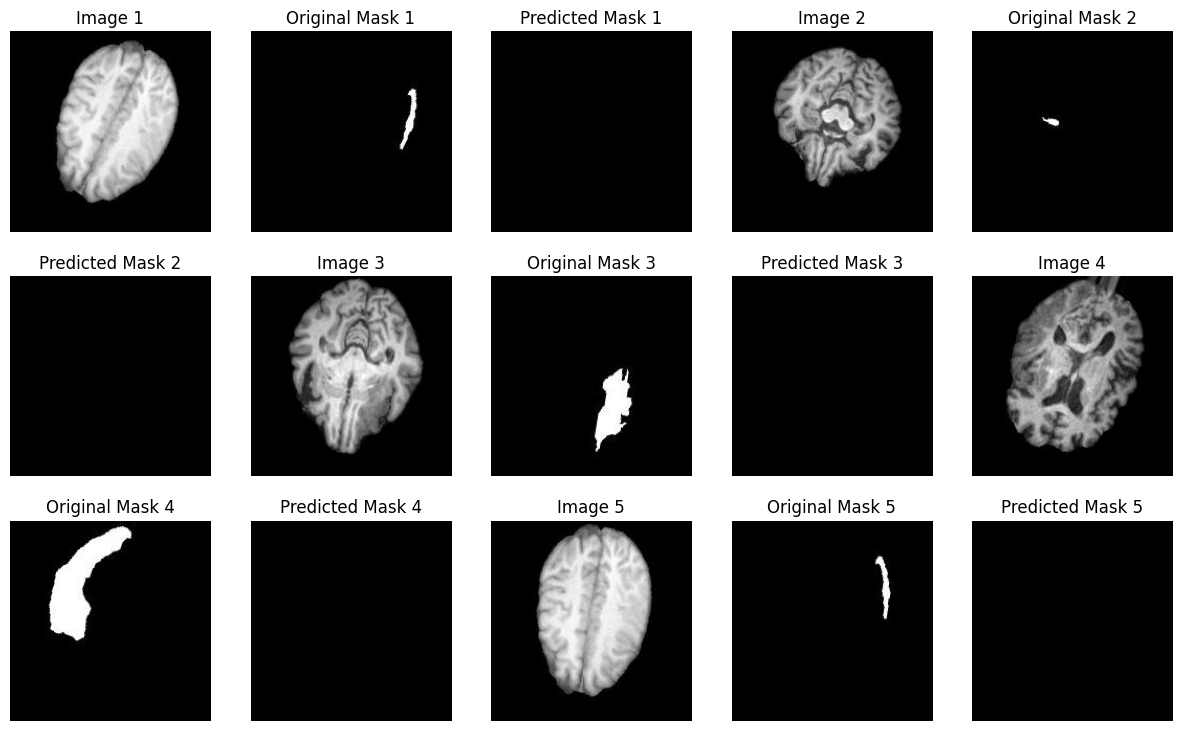

In [10]:
import matplotlib.pyplot as plt

# Function to display images
def show_images(images, titles, rows=1, cols=5):
    plt.figure(figsize=(15, 3 * rows))
    for i in range(len(images)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Process batch of images or masks
def process_batch(batch, is_mask=False):
    processed = []
    for img in batch:
        img = img.squeeze().numpy()
        if not is_mask and img.ndim == 3:  # Transpose only if it's an image with 3 dimensions
            img = img.transpose((1, 2, 0))
        processed.append(img)
    return processed

sample_images_np = []
sample_masks_np = []
predicted_masks_np = []

for i, (image_batch, mask_batch) in enumerate(val_loader):
    if i >= 5:  # Get only 5 samples
        break
    # Process and store individual images and masks from the batch
    sample_images_np.extend(process_batch(image_batch))
    sample_masks_np.extend(process_batch(mask_batch, is_mask=True))

    # Run model inference on each image
    model.eval()
    with torch.no_grad():
        for image in image_batch:
            image = image.unsqueeze(0).to(device)  # Add batch dimension
            output = model(image)['out']
            pred_mask = torch.argmax(output, dim=1)
            predicted_masks_np.append(pred_mask.cpu().squeeze().numpy())

# Plot original and predicted masks
images_to_show = []
titles = []
for i in range(5):
    images_to_show.extend([sample_images_np[i], sample_masks_np[i], predicted_masks_np[i]])
    titles.extend([f"Image {i+1}", f"Original Mask {i+1}", f"Predicted Mask {i+1}"])

show_images(images_to_show, titles, rows=3)